In [46]:
# !pip install japanize-matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scikit_posthocs as sp
import numpy as np
import io
import japanize_matplotlib
from statsmodels.stats.contingency_tables import Table
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d')

In [2]:
# data0 = pd.read_csv(
#     "/Users/yining/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/data_original_analysis_final_20251113.csv")
# data0.drop(columns=["Unnamed: 80","Unnamed: 81","Unnamed: 82"], inplace=True)
# data0.to_csv("/Users/yining/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/data_original_analysis_final_20251113.csv", index=False)
# data0 = pd.read_csv("/Users/yining/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/data_original_analysis_final_20251113.csv")

### <span style="color: blue; ">Data, All(include abuse NA)</span>

In [22]:
data0 = pd.read_csv("/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/AllData_tillMar2024.csv")
# data0.head()

In [23]:
# Simple counts
print("Abuse types count:")
print(data0['abuse'].value_counts())

print("\nAbuse_num for each abuse type:")
print(data0['abuse_num'].value_counts())

print("\nAbuse_num for each abuse type:")
print(data0.groupby('abuse')['abuse_num'].value_counts())

Abuse types count:
abuse
Physical Abuse            677
Delinquency               540
Neglect                   355
Parenting Difficulties    224
Emotional Abuse           211
Others                     87
Sexual Abuse               62
Name: count, dtype: int64

Abuse_num for each abuse type:
abuse_num
1    2071
2      85
0       6
Name: count, dtype: int64

Abuse_num for each abuse type:
abuse                   abuse_num
Delinquency             1            531
                        2              9
Emotional Abuse         1            201
                        2             10
Neglect                 1            328
                        2             27
Others                  1             87
Parenting Difficulties  1            218
                        2              6
Physical Abuse          1            646
                        2             31
Sexual Abuse            1             60
                        2              2
Name: count, dtype: int64


In [24]:
data0.describe()

,No_All,age_year,age_month,age,abuse_1,abuse_num,U17,U16,U15,U14,...,wake_up,breakfast,morning_brushing,school,bedtime,night_brushing,TV,game,meal,extra_lesson
count,2162.000000,2162.000000,2162.000000,2162.000000,85.000000,2162.000000,997.000000,1752.000000,1226.000000,1394.000000,...,198.000000,198.000000,198.000000,197.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1114.974561,10.752081,5.351989,11.198080,3.176471,1.036540,0.217653,0.246575,0.040783,0.078910,...,2.338384,1.419192,1.621212,1.507614,2.833333,1.262626,1.550505,1.575758,1.590909,1.595960
std,679.442749,4.031752,3.494899,4.028647,1.726381,0.201927,0.840592,0.698975,0.328212,0.483259,...,1.545139,0.613747,0.782392,0.739686,1.224745,0.515464,0.498704,0.515563,0.739953,0.502162
min,1.000000,1.000000,0.000000,2.083333,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,541.250000,8.000000,2.000000,8.250000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1081.500000,12.000000,5.000000,12.125000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000
75%,1621.750000,14.000000,8.000000,14.250000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2480.000000,17.000000,15.000000,17.916667,7.000000,2.000000,3.000000,6.000000,3.000000,6.000000,...,6.000000,4.000000,3.000000,4.000000,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000


### <span style="color: blue; ">Data, no NA, Only Abuse</span> → DMFT columns

In [49]:
target_abuse_types = [
    "Physical Abuse", 
    "Neglect", 
    "Emotional Abuse", 
    "Sexual Abuse"
]

data0_Only1Abuse = data0[(data0['abuse_num'] == 1) ]

# Simple counts
print("Abuse types count:")
print(data0_Only1Abuse['abuse'].value_counts())

print("\nAbuse_num for each abuse type:")
print(data0_Only1Abuse['abuse_num'].value_counts())


Abuse types count:
abuse
Physical Abuse     646
Neglect            328
Emotional Abuse    201
Sexual Abuse        60
Name: count, dtype: int64

Abuse_num for each abuse type:
abuse_num
1    1235
Name: count, dtype: int64


In [50]:
data0 = pd.read_csv("/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/data_noNA_OnlyAbuse.csv")
data0.head()

,No_All,CGC,date,sex,age_year,age_month,age,abuse_1,abuse,abuse_num,...,wake_up,breakfast,morning_brushing,school,bedtime,night_brushing,TV,game,meal,extra_lesson
0,3,tokyo,2016-10-12,Female,15,1,15.083333,NaN,Physical Abuse,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,tokyo,2016-10-12,Female,14,5,14.416667,NaN,Emotional Abuse,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,tokyo,2016-10-12,Female,15,10,15.833333,NaN,Neglect,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,tokyo,2016-10-12,Female,15,0,15.000000,NaN,Physical Abuse,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,tokyo,2016-10-12,Female,17,0,17.000000,NaN,Physical Abuse,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Order

In [51]:
# 1. Define the logical order for each column
abuse_order = [
    "Physical Abuse", "Neglect", "Emotional Abuse", "Sexual Abuse"
]
occlusal_order = [
    "Normal Occlusion", "Crowding", "Anterior Crossbite", "Open Bite", 
    "Maxillary Protrusion", "Crossbite", "Others"
]
need_treated_order = ["No Treatment Required", "Treatment Required"]
emergency_order = ["Urgent Treatment Required"]
gingivitis_order = ["No Gingivitis", "Gingivitis"]
oral_clean_order = ["Poor", "Fair", "Good"]
habits_order = [
    "None", "Digit Sucking", "Nail biting", "Tongue Thrusting", 
    "Smoking", "Others"
]

# 2. Convert columns to Categorical with the specified order
# (Replace 'data_noNA_Only1' with your current dataframe variable name if different)
target_df = data0

target_df['abuse'] = pd.Categorical(target_df['abuse'], categories=abuse_order, ordered=True)
target_df['occlusalRelationship'] = pd.Categorical(target_df['occlusalRelationship'], categories=occlusal_order, ordered=True)
target_df['needTOBEtreated'] = pd.Categorical(target_df['needTOBEtreated'], categories=need_treated_order, ordered=True)
target_df['emergency'] = pd.Categorical(target_df['emergency'], categories=emergency_order, ordered=True)
target_df['gingivitis'] = pd.Categorical(target_df['gingivitis'], categories=gingivitis_order, ordered=True)
target_df['OralCleanStatus'] = pd.Categorical(target_df['OralCleanStatus'], categories=oral_clean_order, ordered=True)
target_df['habits'] = pd.Categorical(target_df['habits'], categories=habits_order, ordered=True)

df = target_df

print("Columns converted to ordered categories.")

Columns converted to ordered categories.


In [52]:
# Get a summary of statistics (count, mean, std, min, 25%, 50%, 75%, max)
# data0.describe()

#### Data Check

In [53]:
# Simple counts
print("Abuse types count:")
print(df['abuse'].value_counts())

Abuse types count:
abuse
Physical Abuse     646
Neglect            328
Emotional Abuse    201
Sexual Abuse        60
Name: count, dtype: int64


In [54]:
# Get column names
df.columns

Index(['No_All', 'CGC', 'date', 'sex', 'age_year', 'age_month', 'age',
       'abuse_1', 'abuse', 'abuse_num', 'U17', 'U16', 'U15', 'U14', 'U13',
       'U12', 'U11', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'L37',
       'L36', 'L35', 'L34', 'L33', 'L32', 'L31', 'L41', 'L42', 'L43', 'L44',
       'L45', 'L46', 'L47', 'u55', 'u54', 'u53', 'u52', 'u51', 'u61', 'u62',
       'u63', 'u64', 'u65', 'l75', 'l74', 'l73', 'l72', 'l71', 'l81', 'l82',
       'l83', 'l84', 'l85', 'needTOBEtreated', 'emergency',
       'emergencyInMonths', 'gingivitis', 'occlusalRelationship', 'habits',
       'OralCleanStatus', 'instruction_detail', 'instruction', 'memo',
       'dentists', '\ndental_hygienist', 'wake_up', 'breakfast',
       'morning_brushing', 'school', 'bedtime', 'night_brushing', 'TV', 'game',
       'meal', 'extra_lesson'],
      dtype='object')

#### DMFT Calculate　→ Final Dataframe

In [55]:
# permanent teeth
perm_cols = [
    'U17', 'U16', 'U15', 'U14', 'U13', 'U12', 'U11', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 
    'L37', 'L36', 'L35', 'L34', 'L33', 'L32', 'L31', 'L41', 'L42', 'L43', 'L44', 'L45', 'L46', 'L47'
]
# baby teeth
baby_cols = [
    'u55', 'u54', 'u53', 'u52', 'u51', 'u61', 'u62', 'u63', 'u64', 'u65', 
    'l75', 'l74', 'l73', 'l72', 'l71', 'l81', 'l82', 'l83', 'l84', 'l85'
]
# all teeth
all_cols = perm_cols + baby_cols

# 部位定義（前歯・奥歯）
perm_front = [c for c in perm_cols if c[-1] in ['1', '2', '3']]
perm_back = [c for c in perm_cols if c[-1] in ['4', '5', '6', '7']]
baby_front = [c for c in baby_cols if c[-1] in ['1', '2', '3']]
baby_back = [c for c in baby_cols if c[-1] in ['4', '5']]

関数

In [56]:
def calculate_comprehensive_metrics(row):
    """
    基本指標(DMFT等)とリスク指標(UTN等)をまとめて計算し、
    D,M,F,d,m,f の詳細内訳も返す関数
    """
    # 歯列ごとのデータ抽出
    p_teeth = row[perm_cols] # 永久歯
    b_teeth = row[baby_cols] # 乳歯
    all_teeth = pd.concat([p_teeth, b_teeth]) # 全顎
    
    # -------------------------------------------------------
    # A. 個別カウント (D, M, F, d, m, f)
    # ※ D/d には '3:C' と '8:残根' の両方を含めます（未処置のため）
    # -------------------------------------------------------
    # 永久歯 (Permanent)
    Perm_D = (p_teeth == 3).sum() + (p_teeth == 8).sum() # 未処置 + 残根
    Perm_M = (p_teeth == 4).sum()                        # 喪失
    Perm_F = (p_teeth == 1).sum()                        # 処置
    Perm_DMFT = Perm_D + Perm_M + Perm_F                 # DMFT: 未処置 + 喪失 + 処置

    Perm_C0 = (p_teeth == 2).sum()                       # 永久歯C0：要観察歯
    Perm_DMFT_C0 = Perm_D + Perm_M + Perm_F + Perm_C0    # DMFT+C0: 未処置 + 喪失 + 処置 + 要観察歯
    
    # 乳歯 (Deciduous)
    Baby_d = (b_teeth == 3).sum() + (b_teeth == 8).sum() # 未処置 + 残根
    Baby_m = (b_teeth == 4).sum()                        # 喪失
    Baby_f = (b_teeth == 1).sum()                        # 処置
    Baby_DMFT = Baby_d + Baby_m + Baby_f

    Baby_C0 = (b_teeth == 2).sum()                       # 乳歯C0：要観察歯
    Baby_DMFT_C0 = Baby_d + Baby_m + Baby_f + Baby_C0    # DMFT+C0: 未処置 + 喪失 + 処置 + 要観察歯


    # その他のカウント
    count_C0 = (all_teeth == 2).sum()       # 要観察歯(全体)
    count_Trauma = (all_teeth == 7).sum()   # 外傷(全体)
    count_RDT_total = (all_teeth == 8).sum()# 残根(全体)

    # -------------------------------------------------------
    # B. 総合指標 (Summary Indices)
    # -------------------------------------------------------
    # DMFT Index (永久歯 + 乳歯の合計負荷)
    dmft_total_score = (Perm_D + Perm_M + Perm_F) + (Baby_d + Baby_m + Baby_f)
    dmft_C0 = Perm_DMFT_C0 + Baby_DMFT_C0
    
    # Present Teeth (現在歯数)
    # 除外: -1(未萌出), 6(先天欠如), 4(喪失) and NA (Missing)
    # ※喪失歯(4)は「過去に虫歯だった」指標ですが、「現在口にある」歯ではないため除きます
    present_teeth = len(all_teeth) - all_teeth.isin([-1, 6, 4]).sum() - all_teeth.isna().sum()
    present_baby_teeth = len(b_teeth) - b_teeth.isin([-1, 6, 4]).sum() - b_teeth.isna().sum()
    present_perm_teeth = len(p_teeth) - p_teeth.isin([-1, 6, 4]).sum() - p_teeth.isna().sum()
    
    # Healthy Rate (健全歯率: 処置も虫歯もない歯 / 現在歯数)
    # 健全(0)のみカウント
    count_sound = (all_teeth == 0).sum()
    if present_teeth > 0:
        healthy_rate = (count_sound / present_teeth) * 100
    else:
        healthy_rate = 0
        
    # Care Index (処置率: F / (D+M+F))
    total_filled = Perm_F + Baby_f
    if dmft_total_score > 0:
        care_index = (total_filled / dmft_total_score) * 100
    else:
        care_index = np.nan # カリエスフリーの場合は計算不可
        
    # -------------------------------------------------------
    # C. ネグレクト・リスク指標 (Risk Metrics)
    # -------------------------------------------------------
    # UTN (未処置う蝕率): (D + d) / (D + d + F + f) ※Mは含めない
    active_decay = Perm_D + Baby_d
    total_experience_present = active_decay + total_filled
    
    if total_experience_present > 0:
        utn_score = (active_decay / total_experience_present) * 100
    else:
        utn_score = 0

    # 結果をSeriesで返す
    return pd.Series({
        'Perm_D': Perm_D, 'Perm_M': Perm_M, 'Perm_F': Perm_F,
        'Baby_d': Baby_d, 'Baby_m': Baby_m, 'Baby_f': Baby_f,
        'Perm_DMFT': Perm_DMFT,
        'Baby_DMFT': Baby_DMFT,
        'Perm_DMFT_C0': Perm_DMFT_C0,
        'Baby_DMFT_C0': Baby_DMFT_C0,
        'DMFT_Index': dmft_total_score, # 全体のう蝕経験歯数
        'DMFT_C0': dmft_C0,
        
        'Present_Teeth': present_teeth,
        'Present_Perm_Teeth': present_perm_teeth,
        'Present_Baby_Teeth': present_baby_teeth,
        
        'Healthy_Rate': round(healthy_rate, 1),
        'C0_Count': count_C0,
        'Care_Index': round(care_index, 1),
        
        'Trauma_Count': count_Trauma,   # 外傷数
        'RDT_Count': count_RDT_total,   # 残根数
        'UTN_Score': round(utn_score, 1)# 未処置率(%)
    })

In [57]:
# ==========================================
# 3. 計算とデータフレームへの結合
# ==========================================

# 関数を適用して新しいデータフレームを作成
metrics_df = df.apply(calculate_comprehensive_metrics, axis=1)

# 元のデータフレームに結合 (axis=1 で横に結合)
df_final = pd.concat([df, metrics_df], axis=1)

# ==========================================
# 確認出力
# ==========================================
print("--- 追加された指標のカラム ---")
print(metrics_df.columns.tolist())

--- 追加された指標のカラム ---
['Perm_D', 'Perm_M', 'Perm_F', 'Baby_d', 'Baby_m', 'Baby_f', 'Perm_DMFT', 'Baby_DMFT', 'Perm_DMFT_C0', 'Baby_DMFT_C0', 'DMFT_Index', 'DMFT_C0', 'Present_Teeth', 'Present_Perm_Teeth', 'Present_Baby_Teeth', 'Healthy_Rate', 'C0_Count', 'Care_Index', 'Trauma_Count', 'RDT_Count', 'UTN_Score']


In [58]:
df_final.to_csv("/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/df_final_dmft.csv")
# df_final.head()

## Analysis

In [59]:
df_final = pd.read_csv("/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/data/df_final_dmft.csv", index_col=0)
df_final.columns

Index(['No_All', 'CGC', 'date', 'sex', 'age_year', 'age_month', 'age',
       'abuse_1', 'abuse', 'abuse_num',
       ...
       'DMFT_C0', 'Present_Teeth', 'Present_Perm_Teeth', 'Present_Baby_Teeth',
       'Healthy_Rate', 'C0_Count', 'Care_Index', 'Trauma_Count', 'RDT_Count',
       'UTN_Score'],
      dtype='object', length=101)

In [61]:
# Define the columns to analyze
columns_to_analyze = ['age_year', 'age', 'Perm_D', 'Perm_M', 'Perm_F', 'Baby_d', 
                      'Baby_m', 'Baby_f', 'Perm_DMFT', 'Baby_DMFT', 'Perm_DMFT_C0', 
                      'Baby_DMFT_C0', 'DMFT_Index', 'DMFT_C0','Present_Teeth', 'Present_Perm_Teeth', 
                      'Present_Baby_Teeth', 'Healthy_Rate', 'C0_Count', 'Care_Index', 
                      'Trauma_Count', 'RDT_Count', 'UTN_Score']

# Calculate statistics
stats_summary = df_final[columns_to_analyze].agg([
    'mean',
    'std',      # Standard Deviation
    'median',
    lambda x: x.quantile(0.25),  # 25th percentile
    lambda x: x.quantile(0.75),  # 75th percentile
    'min',
    'max'
]).T  # Transpose to have columns as rows

# Rename the lambda functions to readable names
stats_summary.columns = ['Mean', 'SD', 'Median', '25%', '75%', 'Min', 'Max']

# Round to 2 decimal places
stats_summary = stats_summary.round(2)

# Add a column with variable names (index as column)
stats_summary.insert(0, 'Variable', stats_summary.index)

# More comprehensive version with count
stats_summary = df_final[columns_to_analyze].describe(
    percentiles=[0.25, 0.75]
).T

# Rename columns for clarity
stats_summary = stats_summary.rename(columns={
    'std': 'SD',
    '50%': 'Median',
    'count': 'N'
})

# Select and reorder columns
stats_summary = stats_summary[['N', 'mean', 'SD', 'Median', '25%', '75%', 'min', 'max']]
stats_summary.columns = ['N', 'Mean', 'SD', 'Median', '25%', '75%', 'Min', 'Max']

# Round to 2 decimal places
stats_summary = stats_summary.round(2)

# Reset index to make variable name a column
stats_summary.insert(0, 'Variable', stats_summary.index)

# Display
# print(stats_summary.to_string(index=False))

# Save to CSV
output_path = f'/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/result/descriptive_stats_{timestamp}.csv'
stats_summary.to_csv(output_path, index=False)
print(f"\n✓ Saved to: {output_path}")


✓ Saved to: /Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/result/descriptive_stats_20251204.csv


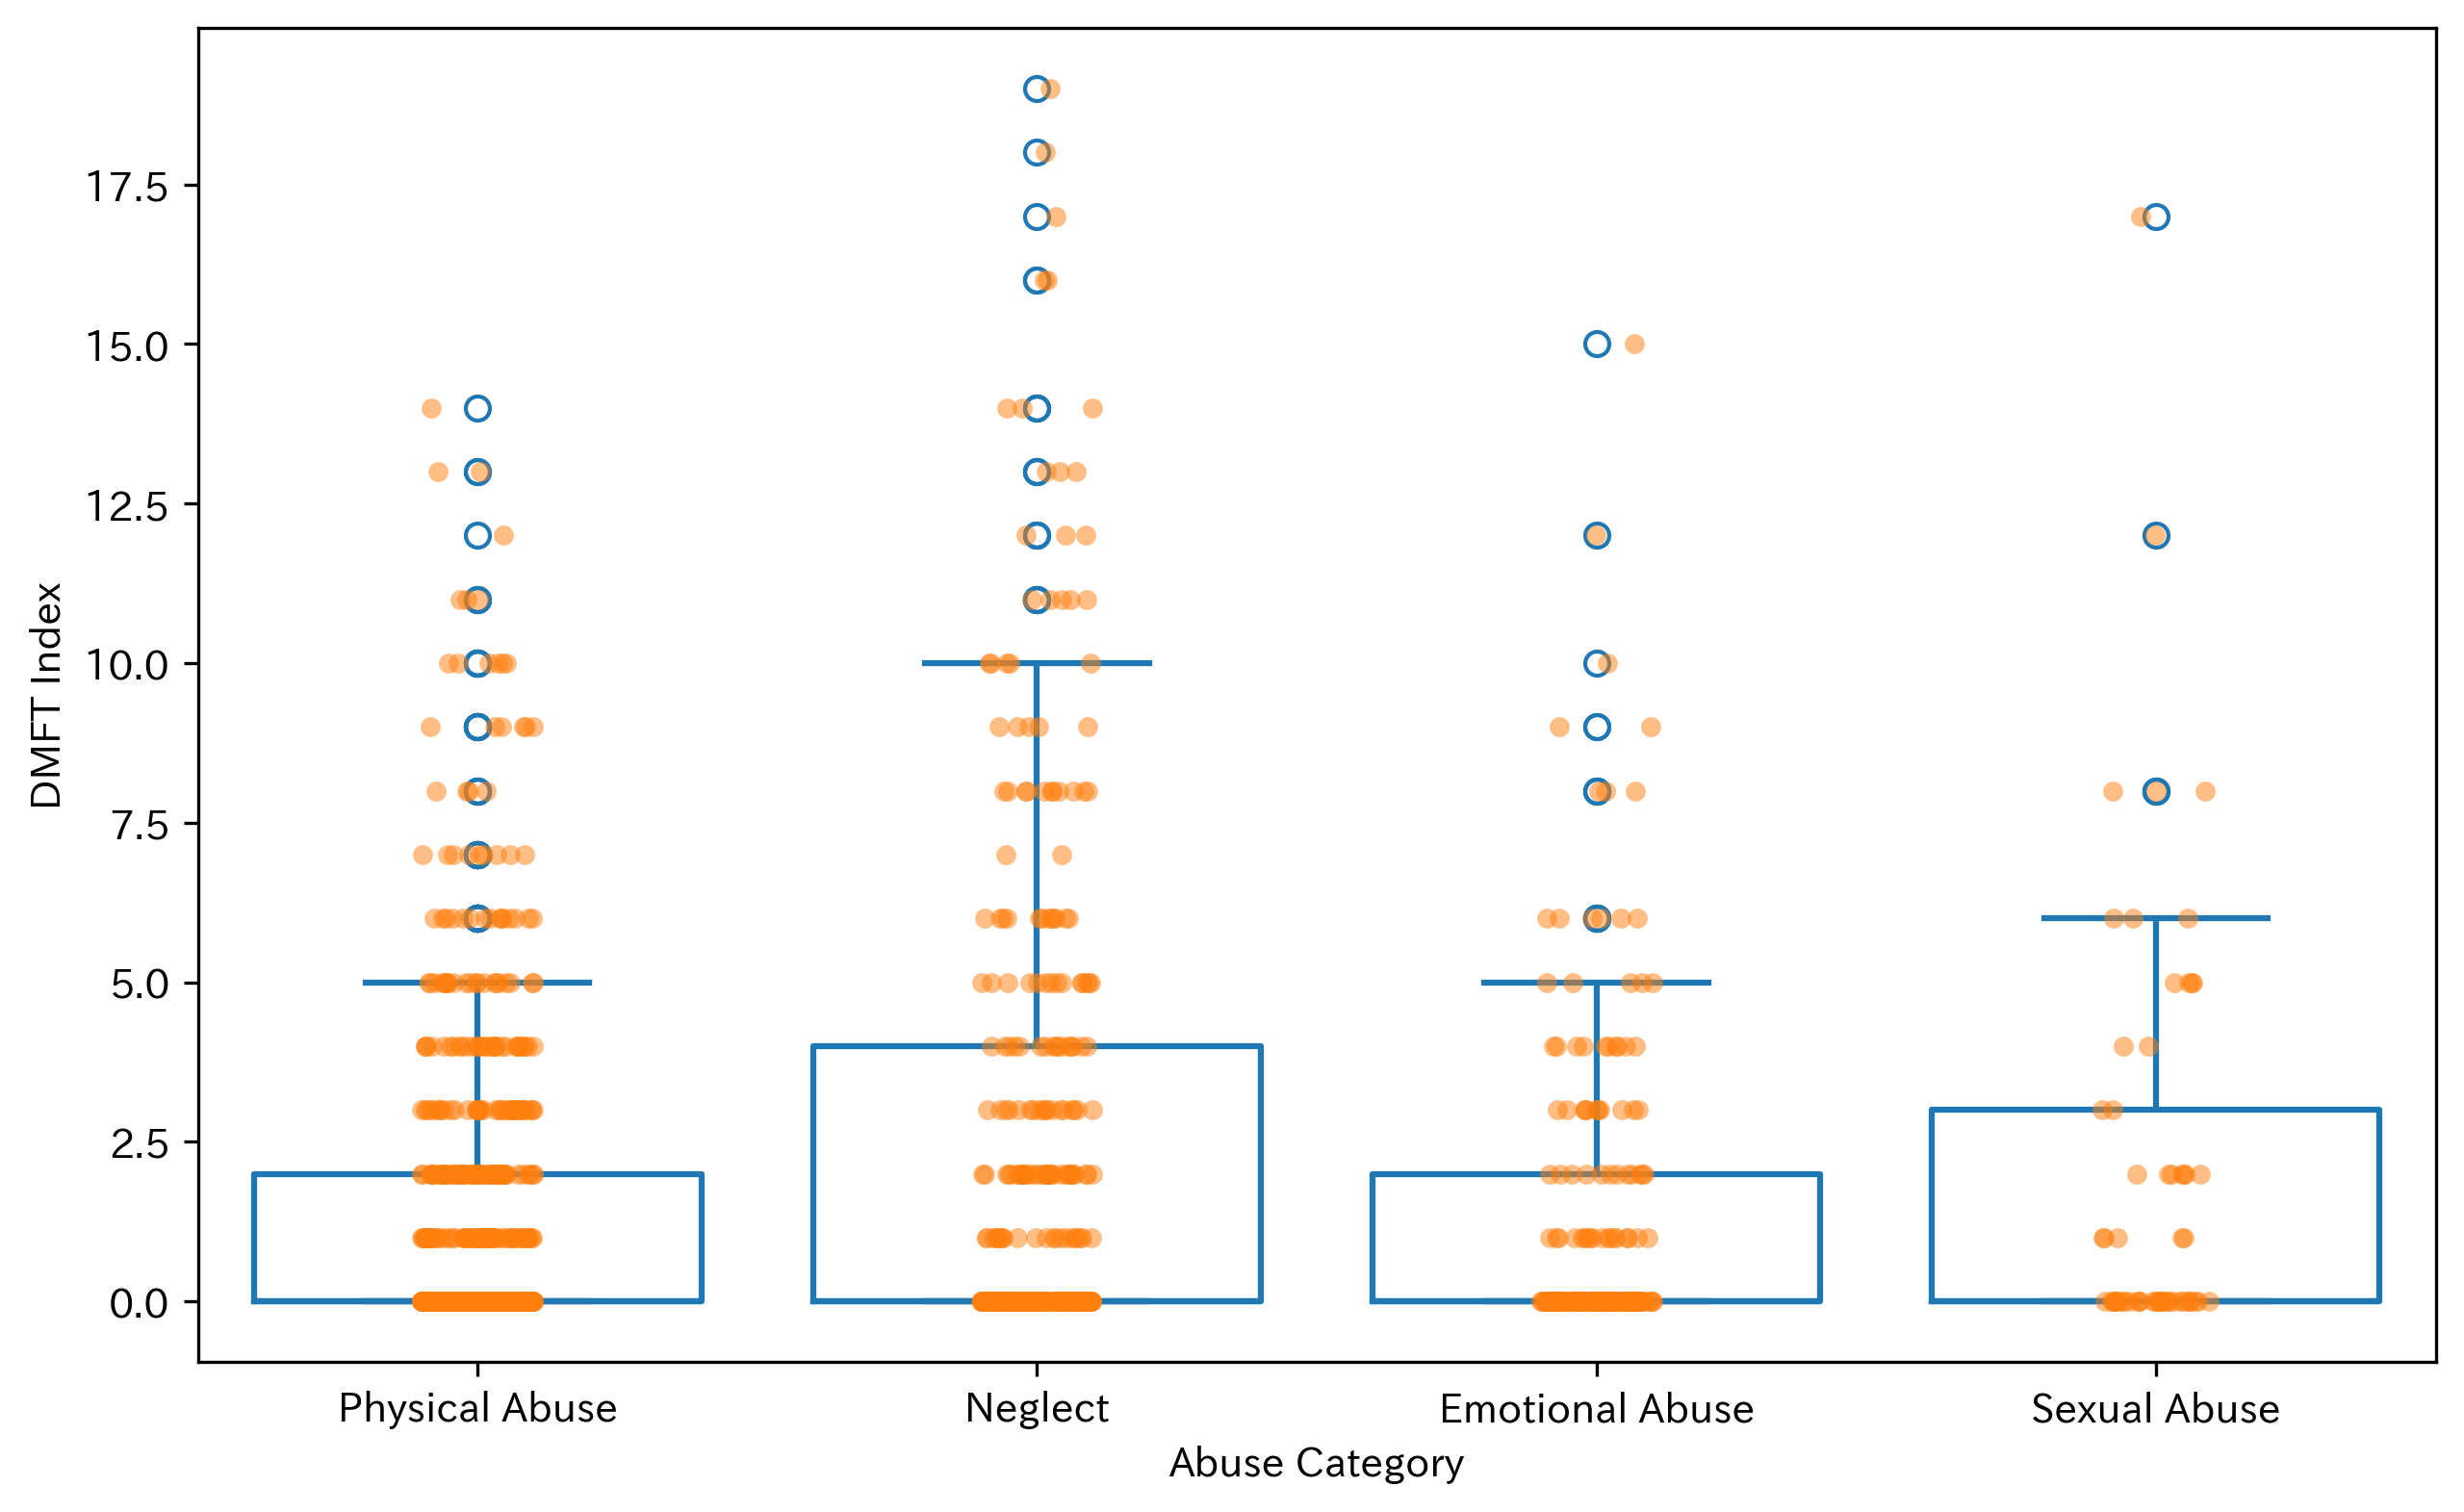

In [10]:
# 可視化
plt.figure(figsize=(10, 6),dpi=300)
sns.boxplot(x='abuse', y='DMFT_Index', data=df_final, fill=False,legend=False)
sns.stripplot(x='abuse', y='DMFT_Index', data=df_final, jitter=True, alpha=0.5)
# sns.swarmplot(x='abuse', y='DMFT_Index', data=df_final, color=".25", size=2) # 分布の点を重ねる
# plt.title('Comparison of DMFT Index by Abuse Type')
plt.xlabel('Abuse Category')
plt.ylabel('DMFT Index')
plt.show()

In [11]:
# 群間検定 (Kruskal-Wallis 検定)
# 各グループのデータをリストに格納
groups = [df_final[df_final['abuse'] == i]['DMFT_Index'] for i in df_final['abuse'].unique()]

# 検定実行
stat, p_value = stats.kruskal(*groups)

print(f"--- Kruskal-Wallis Test Results ---")
print(f"Statistic: {stat:.4f}")
print(f"P-value:   {p_value:.4e}")

if p_value < 0.05:
    print(">> 結果: 有意差あり (p < 0.05)。事後検定を行います。")
    
    # ==========================================
    # 4. 事後検定 (Dunn's Test with Bonferroni correction)
    # ==========================================
    # どの群間に差があるかを特定します
    # p_adjust='bonferroni' (ボンフェローニ補正) または 'holm' (ホルム補正) を推奨
    dunn_results = sp.posthoc_dunn(df_final, val_col='DMFT_Index', group_col='abuse', p_adjust='bonferroni')
    
    print("\n--- Dunn's Post-hoc Test (P-values) ---")
    print(dunn_results)
    
    # 見やすく判定を出力 (0.05以下ならTrue)
    print("\n--- Significant Differences (p < 0.05) ---")
    print(dunn_results < 0.05)
    
else:
    print(">> 結果: 有意差なし (p >= 0.05)。群間に統計的な差は見られませんでした。")

--- Kruskal-Wallis Test Results ---
Statistic: 17.3772
P-value:   5.9108e-04
>> 結果: 有意差あり (p < 0.05)。事後検定を行います。

--- Dunn's Post-hoc Test (P-values) ---
                 Physical Abuse   Neglect  Emotional Abuse  Sexual Abuse
Physical Abuse         1.000000  0.004184         1.000000      1.000000
Neglect                0.004184  1.000000         0.001649      1.000000
Emotional Abuse        1.000000  0.001649         1.000000      0.415717
Sexual Abuse           1.000000  1.000000         0.415717      1.000000

--- Significant Differences (p < 0.05) ---
                 Physical Abuse  Neglect  Emotional Abuse  Sexual Abuse
Physical Abuse            False     True            False         False
Neglect                    True    False             True         False
Emotional Abuse           False     True            False         False
Sexual Abuse              False    False            False         False


In [18]:
# グループごとの件数とDMFT平均値を確認
result_df = df_final.groupby('abuse', observed=True)['DMFT_Index'].agg([
    'count', 
    'mean', 
    'median', 
    'std', 
    ('25%', lambda x: x.quantile(0.25)), 
    ('75%', lambda x: x.quantile(0.75))
])
result_df.to_csv("/Users/ayo/Desktop/_GSAIS_/Research/OralHealth_tokyo/paper_analysis/result/mean_median_result_each_abuse.csv")
print(result_df)

                 count      mean  median       std  25%  75%
abuse                                                       
Physical Abuse     646  1.407121     0.0  2.408617  0.0  2.0
Neglect            328  2.448171     0.0  3.796473  0.0  4.0
Emotional Abuse    201  1.268657     0.0  2.414014  0.0  2.0
Sexual Abuse        60  2.066667     0.0  3.343938  0.0  3.0


In [16]:
# 一元配置分散分析 (One-way ANOVA)
f_stat, p_val_anova = stats.f_oneway(*groups)
print(f"ANOVA P-value: {p_val_anova}")

# 事後検定 (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_final['DMFT_Index'], groups=df_final['abuse'], alpha=0.05)
print(tukey)

ANOVA P-value: 2.396411099928772e-07
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1         group2     meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Emotional Abuse        Neglect   1.1795    0.0  0.5136 1.8454   True
Emotional Abuse Physical Abuse   0.1385 0.9341  -0.462 0.7389  False
Emotional Abuse   Sexual Abuse    0.798 0.2384 -0.2957 1.8917  False
        Neglect Physical Abuse   -1.041    0.0 -1.5451 -0.537   True
        Neglect   Sexual Abuse  -0.3815 0.7832 -1.4254 0.6623  False
 Physical Abuse   Sexual Abuse   0.6595 0.3288 -0.3438 1.6629  False
--------------------------------------------------------------------


### 虐待別

In [21]:
df_physical = df_final[df_final['abuse'] == "Physical Abuse"]
df_neglect = df_final[df_final['abuse'] == "Neglect"]
df_emotional = df_final[df_final['abuse'] == "Emotional Abuse"]
df_sexual = df_final[df_final['abuse'] == "Sexual Abuse"]